### 因為有朋友之前問可不可以用python畫出靜態的K線圖，稍微搜尋了一下，雖然不好畫，但可以畫，而且還可以畫出ggplot2的風格！

## 載入套件

In [126]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib

## 設定畫圖風格

In [128]:
# 直接畫在html上
%matplotlib inline
# ggplot就是潮
matplotlib.style.use('ggplot')

## 載入股票資料

### 利用pandas_datareader，從Yahoo! Finance抓檔案。後面`TWO`是為了將資料處理成`tuple`的開始。

In [3]:
st = datetime.date(2016, 1, 1)
en = datetime.datetime.today()
TWO6187 = data.get_data_yahoo("6187.TWO", st, en)
TWO = TWO6187.reset_index()

## 將日期轉成數字

### Return value is a floating point number (or sequence of floats) which gives the number of days (fraction part represents hours, minutes, seconds) since 0001-01-01 00:00:00 UTC, *plus* *one*.

In [140]:
import matplotlib.dates as mdates
print TWO.Date[1]
print mdates.date2num(TWO.Date[1])

2016-01-04 00:00:00
735967.0


In [144]:
TWO['date_num'] = TWO['Date'] \
    .apply(lambda date: mdates.date2num(date))

### 為了讓成交量可以依照當天漲跌情況上色，`TWO`新增一個欄位`color`

In [ ]:
TWO.color='red'
TWO.color[TWO.Close-TWO.Open<0]='green'
TWO.color[TWO.Close-TWO.Open==0]='gray'

## 轉成Tuple

In [138]:
TWO_as_tuples = [tuple(x) for x in \
                 TWO[['date_num', 'Open', \
                      'High', 'Low', 'Close']].values]

## 開始畫圖

<Container object of 202 artists>

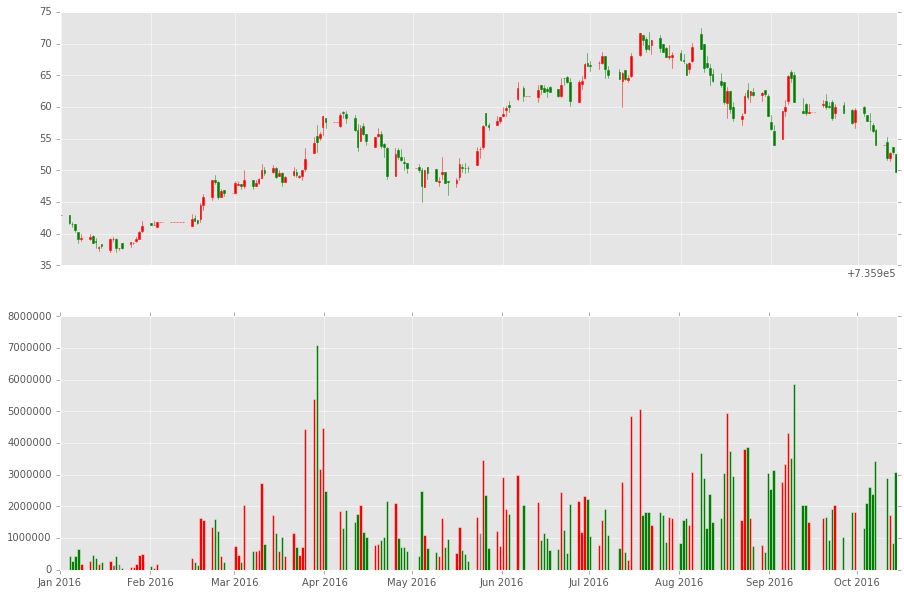

In [157]:
fig = plt.figure(figsize=[15,10])
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
from matplotlib.finance import candlestick_ohlc
import matplotlib.gridspec as gridspec

## 畫出上下兩張圖
gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

## 讓上下兩張圖tick隨時間和資料量自動調整
days = AutoDateLocator()       
ax1.xaxis.set_major_locator(days)
ax2.xaxis.set_major_locator(days)
## 順便讓tick的日期格式自動調整
Formatter = AutoDateFormatter(days)
ax2.xaxis.set_major_formatter(Formatter)

## 想要讓兩張圖共用X軸，所以隱藏上圖的X軸
ax1.tick_params(
    axis='x',          
    which='both',      
    bottom='off',      
    top='off',        
    labelbottom='off')

## ax1畫出K線，這邊一定要調整width，否則K線會左右重疊
candlestick_ohlc(ax1, TWO_as_tuples, width=0.6, 
                     colorup='r',colordown='g');

## 畫出成交量
ax2.bar(TWO6187.index, TWO6187.Volume,color=TWO.color)

### 不調整風格的話，畫出來真的很醜

(<matplotlib.collections.LineCollection at 0x10ca49610>,
 <matplotlib.collections.PolyCollection at 0x10ca49910>)

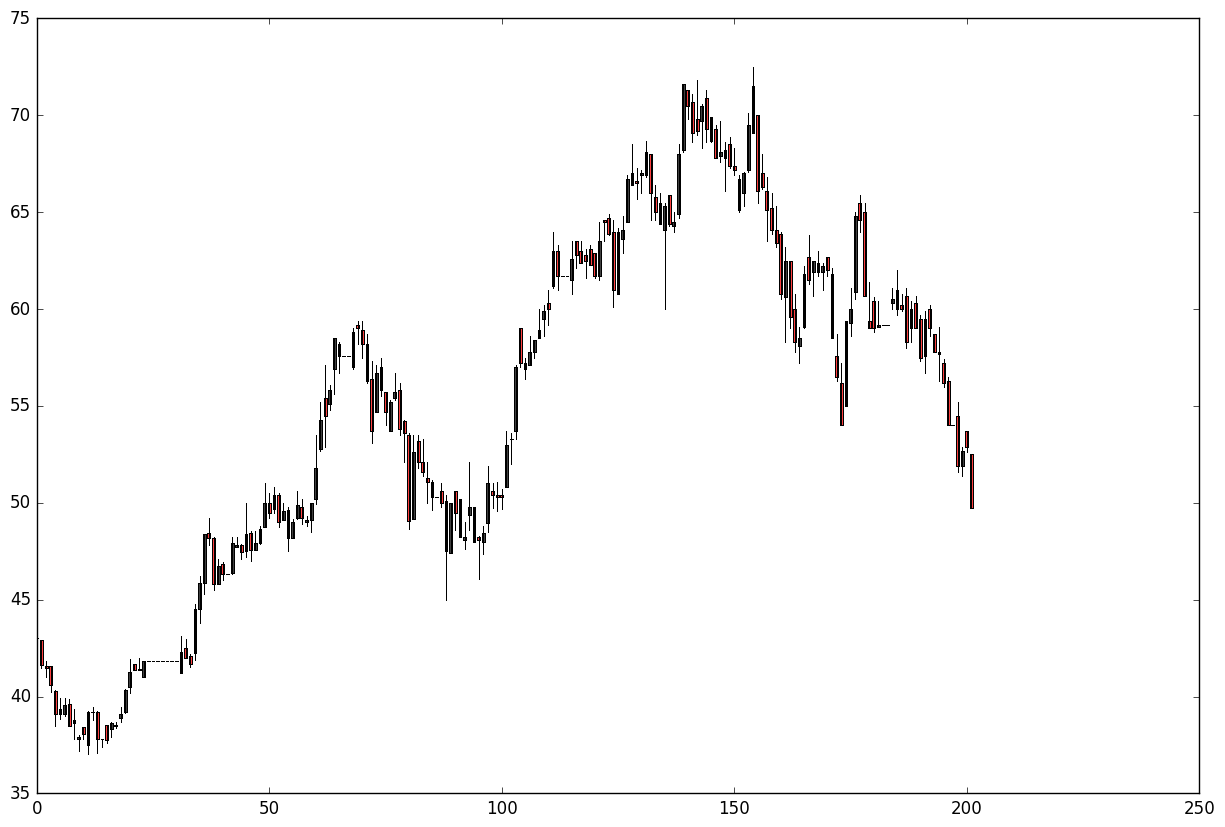

In [29]:
fig, ax = plt.subplots(figsize=[15,10])
candlestick2_ohlc(ax,TWO.Open,TWO.High,TWO.Low,TWO.Close, width=0.6)

## 個人還是比較喜歡`plotly`